In [2]:
#encoding utf-8
import numpy as np
import pandas as pd
import xlrd
import codecs
from IPython.display import Image

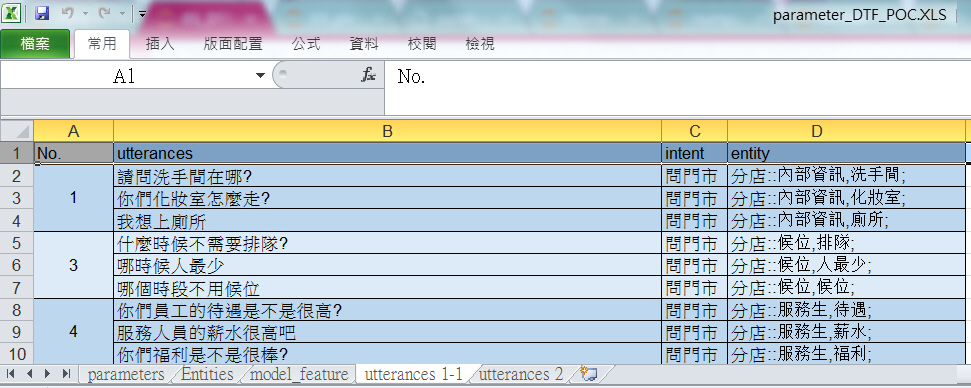

In [3]:
#http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
DTFQA = pd.read_excel('./db/parameter_DTF_POC.XLS', 'utterances 1-1')
Image('./db/DTF_QA_example.jpg')

In [4]:
pd.DataFrame(DTFQA, index=[0,1,2,3],columns=['No.'])

,No.
0,1
1,NaN
2,NaN
3,3


In [5]:
null_flag = DTFQA['No.'].isnull()

for i in range(len(null_flag)):
    QAid = DTFQA.get_value(i,'No.')
    if pd.isnull(DTFQA['No.'][i]) == False:
        target_id = QAid
        DTFQA['No.'][i] = str(target_id)   
        continue
    else:
        DTFQA['No.'][i] = str(target_id)     
    

In [6]:
pd.DataFrame(DTFQA,index=[0,1,2,3])

,No.,utterances,intent,entity
0,1,請問洗手間在哪?,問門市,"分店::內部資訊,洗手間;"
1,1,你們化妝室怎麼走?,問門市,"分店::內部資訊,化妝室;"
2,1,我想上廁所,問門市,"分店::內部資訊,廁所;"
3,3,什麼時候不需要排隊?,問門市,"分店::候位,排隊;"


In [7]:
DTFQA.to_pickle('./db/DTFQA_v01')

In [8]:
# TEST to read saved file
DTFQA = pd.read_pickle('./db/DTFQA_v01')

In [9]:
### testing code ###
idx = DTFQA.iloc[:,0].values
idx
#np.where(idx== NaN)

array(['1', '1', '1', '3', '3', '3', '4', '4', '4', '5', '5', '5', '5-1',
       '5-1', '5-1', '6', '6', '6', '6-1', '6-1', '6-1', '7', '7', '7',
       '8', '8', '8', '11', '11', '11', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '13',
       '13', '13', '13', '13', '13', '13', '13', '13', '13', '15', '15',
       '15', '15', '15', '15', '15', '15', '15', '15', '16', '16', '16',
       '16', '16', '16', '16', '16', '16', '16', '17', '17', '17', '17',
       '17', '17', '17', '17', '17', '17', '18', '18', '18', '18', '18',
       '18', '18', '18', '18', '18', '18-1', '18-1', '18-1', '18-1',
       '18-1', '18-1', '18-1', '18-1', '18-1', '18-1', '18-2', '18-2',
       '18-2', '18-2', '18-2', '18-2', '18-2', '18-2', '18-2', '18-2'], dtype=object)

In [9]:
#==========================================================================
# 以下是用 xlrd 處理 excel xls 的 example, 僅作參考
#==========================================================================

In [ ]:
xls_header = xlrd.open_workbook('./db/parameter_DTF_POC.XLS')
Image('./db/DTF_QA_example.jpg')

In [ ]:
sheet_names =  xls_header.sheet_names()
print('Sheet Names', sheet_names)

In [ ]:
xl_sheet = xls_header.sheet_by_name(sheet_names[3])

In [ ]:
## show row 1, col 1 context
row1 = xl_sheet.row(0)
col1 = xl_sheet.col(0)[1:5]
print 'row 1 = ' + str(row1)
print 'col 1 = ' + str(col1)

In [ ]:
num_cols = xl_sheet.ncols
num_rows = xl_sheet.nrows - 1 # row num should exclude title
print 'col # = ' + str(num_cols)
print 'row # = ' + str(num_rows)

In [ ]:
for row_idx in range(0, num_rows):    # Iterate through rows
    print ('-'*40)
    print ('Row: %s' % row_idx)   # Print row number
    for col_idx in range(0, num_cols):  # Iterate through columns
        cell_obj = xl_sheet.cell(row_idx, col_idx)  # Get cell object by row, col
        print ('Column: [%s] cell_obj: [%s]' % (col_idx, cell_obj))